# Rival Penalized K-means Algorithm #

Randomly generate a bunch of data points that can be clustered into two groups.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from time import sleep

In [2]:
def squared_distance(x1, y1, x2, y2):
    return np.sqrt((x1 - x2) ** 2 + (y1 - y2) ** 2)

In [3]:
# Construct the (rival penalized) matrix A according to the 
# squared distance b/t each data point and each cluster.
# See the report for a detailed description of the matrix A
def expectation(X, Y, cluster_X, cluster_Y, gamma):
    '''
    Params: 
    X: x-coordinates of all the data points, shape = (N, )
    Y: y-coordinates of all the data points, shape = (N, )
    cluster_X: x-coordinates of all the clusters, shape = (K, )
    cluster_Y: y-coordinates of all the clusters, shape = (K, )
    
    Return:
    A matrix of shape (N, K) whose entries are described in the report
    '''
    
    N = X.shape[0]
    K = cluster_X.shape[0]
    
    A = np.zeros(shape=(N, K))
    
    # Fill in each entry with the squared distance first
    for row in range(N):
        for col in range(K):
            A[row][col] = squared_distance(X[row], Y[row], cluster_X[col], cluster_Y[col])
    
    # Convert the matrix to rival penalized version
    for row in range(N):
        # Find the cloest and second-closest clusters for each row (each data point x_i)
        sorted_A_row = np.sort(np.copy(A[row]))
        closest_dist = sorted_A_row[0]
        second_closest_dist = sorted_A_row[1]
        
        for col in range(K):
            if A[row][col] == closest_dist:
                A[row][col] = 1.
            elif A[row][col] == second_closest_dist:
                A[row][col] = gamma
            else:
                A[row][col] = 0.
    
    return A

In [4]:
X = np.array([1., 1., 10.])
Y = np.array([1., 10., 10.])

cluster_X = np.array([2., 2., 2.])
cluster_Y = np.array([1.5, 10., 11.])

A = expectation(X, Y, cluster_X, cluster_Y, gamma=-0.1)
print(A.shape)
print(A)

(3, 3)
[[ 1.  -0.1  0. ]
 [ 0.   1.  -0.1]
 [ 0.   1.  -0.1]]


*Expected*: 
[[1.  -0.1  0.] 
 [0.  1.  -0.1] 
 [0.  1.  -0.1]]

In [5]:
# Update cluster_X and cluster_Y in place
# according to equation 2 in the report
def maximization(A, X, Y, cluster_X, cluster_Y):
    '''
    Params:
    A: the matrix (2D array) constructed via expectation function. Shape = (N, K)
    X: x-coordinates of all the data points, shape = (N, )
    Y: y-coordinates of all the data points, shape = (N, )
    cluster_X: x-coordinates of clusters. Shape = (K, )
    cluster_Y: y-coordinates of clusters. Shape = (K, )
    
    Return:
    None
    '''
    
    N = A.shape[0]
    K = A.shape[1]
    
    # Compute the new coordinate of each cluster \mu_k
    for col in range(K):
        new_x = 0.
        new_y = 0.
        
        for row in range(N):
            new_x += A[row][col] * X[row]
            new_y += A[row][col] * Y[row]
        
        # Update each cluster's coordinate if it has at least
        # one non-zero assignment
        if np.sum(A[:, col]) != 0:
            new_x /= np.sum(A[:, col])
            new_y /= np.sum(A[:, col])

            cluster_X[col] = new_x
            cluster_Y[col] = new_y

Now that we have implemented the two steps (E-step and M-step) in a rival penalized K-means algorithm, we can go ahead and implement the main program for this algorithm.

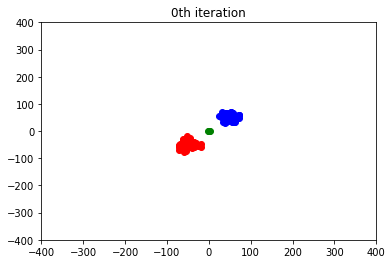

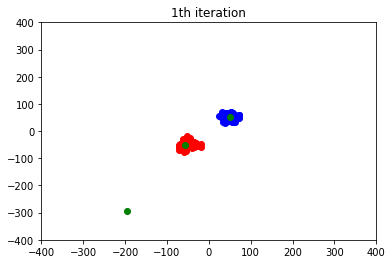

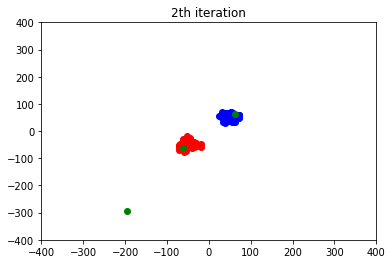

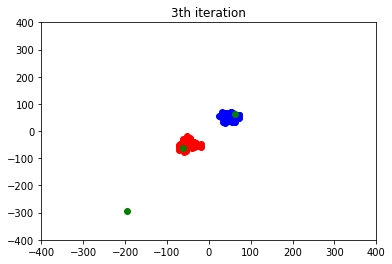

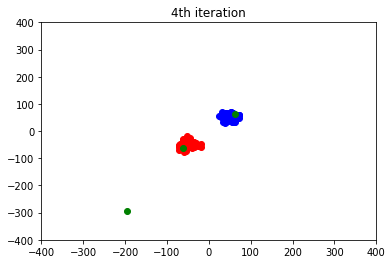

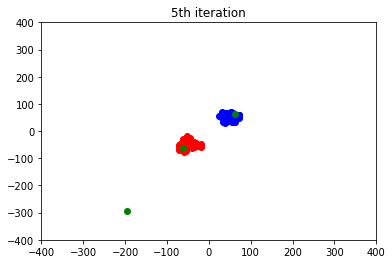

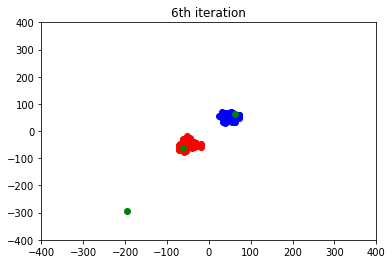

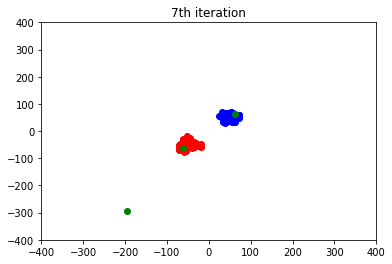

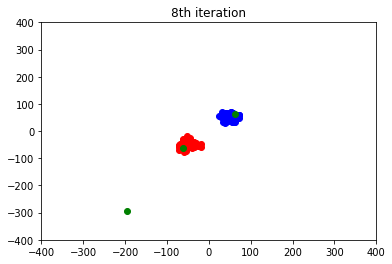

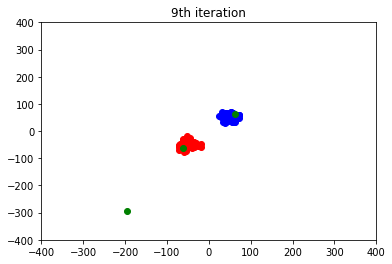

In [54]:
# Generate two group of data points
X1 = 10 * np.random.randn(100) - 50.
Y1 = 10 * np.random.randn(100) - 50.

X2 = 10 * np.random.randn(100) + 50.
Y2 = 10 * np.random.randn(100) + 50.

# Concatenate all data points
X = np.concatenate((X1, X2))
Y = np.concatenate((Y1, Y2))

# Generate three clusters from fixed positions
cluster_X = np.array([0.1, 2, -1])
cluster_Y = np.array([0.1, 2, 1])


num_iter = 10
gamma = -0.1

for it in range(num_iter):
    # Plot the clusters
    plt.plot(X1, Y1, 'ro')
    plt.plot(X2, Y2, 'bo')
    plt.plot(cluster_X, cluster_Y, 'go')
    plt.axis([-400, 400, -400, 400])
    plt.title(str(it) + 'th iteration')
    plt.show()
    sleep(1)
    
    # E-step
    A = expectation(X, Y, cluster_X, cluster_Y, gamma)

    # M-step
    maximization(A, X, Y, cluster_X, cluster_Y)
    

    
    
    
    
    